# kNN predictor for Titanic survivors
Bleuenn Roiron - Léa Zuili

In [1]:
import os #path handling
import numpy as np #import numpy drives sklearn to use numpy arrays instead of python lists
import pandas as pd #CSV and dataframe handling
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier #kNN classifier
from sklearn.model_selection import train_test_split #Data set splitting functions
from sklearn.metrics import confusion_matrix #Confusion matrix

# Data import and formatting

## Training

In [2]:
dataFile = os.path.join('train.csv') # data file to use

In [95]:
# we assign column names based on the description file. 'FType' stands for 'Flower Type'
trainDF = pd.read_csv(dataFile,header=1,names=["PassengerId","Survived","Pclass","Name","Sex","Age","SibSp","Parch","Ticket","Fare","Cabin","Embarked"]) 
trainDF # let's take a random sample from the full data frame

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
1,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
2,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
3,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
4,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
...,...,...,...,...,...,...,...,...,...,...,...,...
885,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
886,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
887,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
888,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [15]:
# Let's define a mapping function from 'Sex' to a class number
def dataSex(FType):
  mapping = {'male': 0,
            'female': 1}
  return mapping[FType]

In [63]:
# Let's define a mapping function from 'Embarked' to a class number
def dataEmb(FType):
    mapping = {'C': 1,
            'Q': 2,
            'S': 3}
    if not pd.isna(FType) :
        return mapping[FType]

In [109]:
# Let's define a mapping function from 'Embarked' to a class number
def dataCabin(item):
    if not pd.isna(item) :
        if item.find(" ")!=-1:
            item = item[0:item.find(" ")]
        try:
            FType = item[0]
            mapping = {'A': 1,
                'B': 2,
                'C': 3,
                'D': 4,
                'E': 5,
                'F': 6,
                'G': 7,
                'T' : 8}
            item=str(mapping[FType]) + item[1:]
        except :
            print(item)
    return item

In [141]:
# Let's apply the mapping function to the input data
trainDF['sex_format'] = [dataSex(item) for item in trainDF['Sex']]
trainDF['cabin_format'] = [dataCabin(item) for item in trainDF['Cabin']]
trainDF['Embarked_format'] = [dataEmb(item) for item in trainDF['Embarked']]
trainDF["Age"].fillna(28,inplace=True)   ## on donne la valeur médiane d'age au rang où l'âge n'est pas renseigné
trainDF["cabin_format"].fillna(0,inplace=True)   ## on donne la valeur 0 quand les cabines ne sont pas renseignées
trainDF["Embarked_format"].fillna(0,inplace=True) ## on donne la valeur 0 quand les lieux d'embarquement ne sont pas renseignées
trainDF

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,sex_format,cabin_format,Embarked_format
0,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,1,385,1.0
1,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,1,0,3.0
2,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,1,3123,3.0
3,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,0,0,3.0
4,6,0,3,"Moran, Mr. James",male,28.0,0,0,330877,8.4583,NaN,Q,0,0,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
885,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S,0,0,3.0
886,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S,1,242,3.0
887,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,28.0,1,2,W./C. 6607,23.4500,NaN,S,1,0,3.0
888,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C,0,3148,1.0


On ne retient pas la colonne "noms" pour l'algorithme K-NN car formatter ces données nous semble trop compliqué. En effet, le nom peut contenir beaucoup d'infrmations comme la classe sociale ou l'origine ethnique. Ainsi, représenter ces données par des floatant représente déjà un travail de traitement de données. De plus, selon nous, l'information contenue la plus importante est la classe sociale et c'est une information qu'on peut retrouver dans le prix du billet. 
De même, on ne s'occupe pas de la variable "Ticket", car les valeurs peuvent être représentées de manières très différentes d'un billet à l'autre, il est donc difficile de les formatter. 

In [142]:
# Separate data from classes
train_dataDF = trainDF[["PassengerId","Pclass","Name","Sex","Age","SibSp","Parch","Ticket","Fare","Cabin","Embarked","sex_format","cabin_format","Embarked_format"]]

train_classDF = trainDF[["PassengerId","Survived"]]

In [143]:
trainDF.describe() # quick statistical description of the dataframe

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,sex_format,Embarked_format
count,890.000000,890.000000,890.000000,890.000000,890.000000,890.000000,890.000000,890.000000,890.000000
mean,446.500000,0.384270,2.307865,29.369854,0.522472,0.382022,32.232246,0.352809,2.529213
std,257.065167,0.486696,0.836220,13.024675,1.103247,0.806409,49.714317,0.478113,0.800548
min,2.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,224.250000,0.000000,2.000000,22.000000,0.000000,0.000000,7.925000,0.000000,2.000000
50%,446.500000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200,0.000000,3.000000
75%,668.750000,1.000000,3.000000,35.000000,1.000000,0.000000,31.000000,1.000000,3.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200,1.000000,3.000000


## Test

In [129]:
dataFileTest = os.path.join('test.csv') # data file to use
dataFileGS =  os.path.join('gender_submission.csv')

In [144]:
# we assign column names based on the description file
test_dataDF = pd.read_csv(dataFileTest,header=1,names=["PassengerId","Pclass","Name","Sex","Age","SibSp","Parch","Ticket","Fare","Cabin","Embarked"]) 


# we assign column names based on the description file
test_classDF = pd.read_csv(dataFileGS,header=1,names=["PassengerId","Survived"]) 
test_dataDF.sample(10) # let's take a random sample from the full data frame

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
46,939,3,"Shaughnessy, Mr. Patrick",male,NaN,0,0,370374,7.7500,NaN,Q
10,903,1,"Jones, Mr. Charles Cresson",male,46.0,0,0,694,26.0000,NaN,S
167,1060,1,"Cassebeer, Mrs. Henry Arthur Jr (Eleanor Genev...",female,NaN,0,0,17770,27.7208,NaN,C
289,1182,1,"Rheims, Mr. George Alexander Lucien",male,NaN,0,0,PC 17607,39.6000,NaN,S
319,1212,3,"Andersson, Mr. Johan Samuel",male,26.0,0,0,347075,7.7750,NaN,S
367,1260,1,"Gibson, Mrs. Leonard (Pauline C Boeson)",female,45.0,0,1,112378,59.4000,NaN,C
100,993,2,"Weisz, Mr. Leopold",male,27.0,1,0,228414,26.0000,NaN,S
310,1203,3,"Vartanian, Mr. David",male,22.0,0,0,2658,7.2250,NaN,C
128,1021,3,"Petersen, Mr. Marius",male,24.0,0,0,342441,8.0500,NaN,S
18,911,3,"Assaf Khalil, Mrs. Mariana (Miriam"")""",female,45.0,0,0,2696,7.2250,NaN,C


In [150]:
# Let's apply the mapping function to the input data
test_dataDF['sex_format'] = [dataSex(item) for item in test_dataDF['Sex']]
test_dataDF['cabin_format'] = [dataCabin(item) for item in test_dataDF['Cabin']]
test_dataDF['Embarked_format'] = [dataEmb(item) for item in test_dataDF['Embarked']]
test_dataDF["Age"].fillna(28,inplace=True)
test_dataDF["cabin_format"].fillna(0,inplace=True)
test_dataDF["Embarked_format"].fillna(0,inplace=True)
test_dataDF["Fare"].fillna(14.454200,inplace=True)
test_dataDF

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,sex_format,cabin_format,Embarked_format
0,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S,1,0,3
1,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q,0,0,2
2,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S,0,0,3
3,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S,1,0,3
4,897,3,"Svensson, Mr. Johan Cervin",male,14.0,0,0,7538,9.2250,NaN,S,0,0,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
412,1305,3,"Spector, Mr. Woolf",male,28.0,0,0,A.5. 3236,8.0500,NaN,S,0,0,3
413,1306,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C,1,3105,1
414,1307,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S,0,0,3
415,1308,3,"Ware, Mr. Frederick",male,28.0,0,0,359309,8.0500,NaN,S,0,0,3


PassengerId          0
Pclass               0
Name                 0
Sex                  0
Age                  0
SibSp                0
Parch                0
Ticket               0
Fare                 0
Cabin              326
Embarked             0
sex_format           0
cabin_format         0
Embarked_format      0
dtype: int64

# Première méthode : KNN avec variables que l'on choisi nous même

Après étude des variables disponibles, il nous a semblé que certaines étaient redondantes voire non nécessaires. Notamment, il nous semble qu'on peut obtenir une classification pertinente en ne retenant que les variables : "Pclass", "Sex", "Age" et cabine. Afin de vérifier cette intuition, on lance l'algorithme KNN avec toutes les variables puis avec les variables choisies seulement et on regarde si on perd en performance. 

Text(0.5, 1.0, 'Error rate as a function of k')

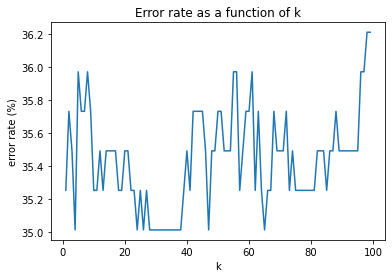

In [169]:
# Utilisation des variables choisies seulement
# Test sur la valeur de k 

trainDF_all = train_dataDF[["PassengerId","Pclass","Age","SibSp","Parch","Fare","sex_format","cabin_format","Embarked_format"]]
testDF_all = test_dataDF[["PassengerId","Pclass","Age","SibSp","Parch","Fare","sex_format","cabin_format","Embarked_format"]]

X = []
error_rate_all = []
identity = np.identity(2)
identity_inv = np.ones((2,2)) - identity


for k in range(1,100) :
    # training
    kNN = KNeighborsClassifier(n_neighbors=k,algorithm='kd_tree',metric='minkowski',p=2,n_jobs=-1)
    kNN.fit(trainDF_all,train_classDF)
    
    # testing
    predictions = kNN.predict(testDF_all)
    testCM = confusion_matrix(y_pred=predictions[:,1],y_true=test_classDF["Survived"])
    test = testCM*identity_inv
    error = sum(sum(test))*100/sum(sum(testCM))

    
    error_rate_all += [error]
    X += [k]

fig, ax = plt.subplots()
ax.plot(X,error_rate_all)
ax.set_xlabel('k')
ax.set_ylabel('error rate (%)')
ax.set_title('Error rate as a function of k')



Au vu des résultats précédents, on choisit k=35.

In [163]:
# Check the classifier's performance on the training data
trainPredictions = kNN.predict(trainDF_all)
trainCM = confusion_matrix(y_pred=trainPredictions[:,1],y_true=train_classDF["Survived"])
print(trainCM)

[[505  43]
 [237 105]]


Text(0.5, 1.0, 'Error rate as a function of k')

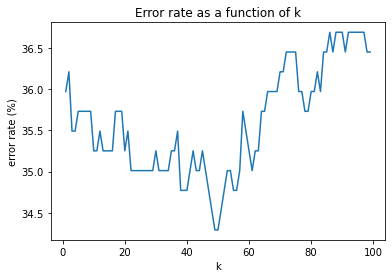

In [168]:
# Utilisation de toutes les variables
# Test sur la valeur de k 

trainDF_few = train_dataDF[["PassengerId","Pclass","Age","sex_format","cabin_format"]]
testDF_few = test_dataDF[["PassengerId","Pclass","Age","sex_format","cabin_format"]]

X = []
error_rate_few = []
identity = np.identity(2)
identity_inv = np.ones((2,2)) - identity


for k in range(1,100) :
    # training
    kNN = KNeighborsClassifier(n_neighbors=k,algorithm='kd_tree',metric='minkowski',p=2,n_jobs=-1)
    kNN.fit(trainDF_few,train_classDF)
    
    # testing
    predictions = kNN.predict(testDF_few)
    testCM = confusion_matrix(y_pred=predictions[:,1],y_true=test_classDF["Survived"])
    test = testCM*identity_inv
    error = sum(sum(test))*100/sum(sum(testCM))
    
    error_rate_few += [error]
    X += [k]

fig, ax = plt.subplots()
ax.plot(X,error_rate_few)
ax.set_xlabel('k')
ax.set_ylabel('error rate (%)')
ax.set_title('Error rate as a function of k')

Text(0.5, 1.0, 'Error rate as a function of k')

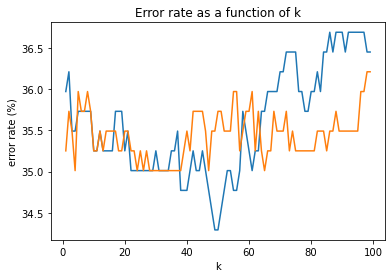

In [170]:
# Comparaison

fig, ax = plt.subplots()
ax.plot(X,error_rate_few)
ax.plot(X,error_rate_all)
ax.set_xlabel('k')
ax.set_ylabel('error rate (%)')
ax.set_title('Error rate as a function of k')



On voit que retirer des variables nous fait perdre en précision.

algo à rajouter : svm, NN et PCA. Calculer d'autres métriques
svm : https://ledatascientist.com/support-vector-machines-svm-en-python/

## Deuxième méthode SVM

### Test avec un noyeau linéaire

In [174]:
from sklearn.svm import SVC
from sklearn.metrics import classification_report


In [ ]:
classifier = SVC(kernel = 'linear', random_state = 0)
classifier.fit(trainDF_all, train_classDF["Survived"])

y_pred = classifier.predict(testDF_all)

print(classification_report(testDF_all, y_pred))